# Ann Diabetes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [3]:
data = pd.read_csv("C:/Users/vamsi/Downloads/blood sugar/dataset.csv")
#data=pd.read_csv("C:/Users/vamsi/OneDrive/Documents/research/diabetes_norm.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


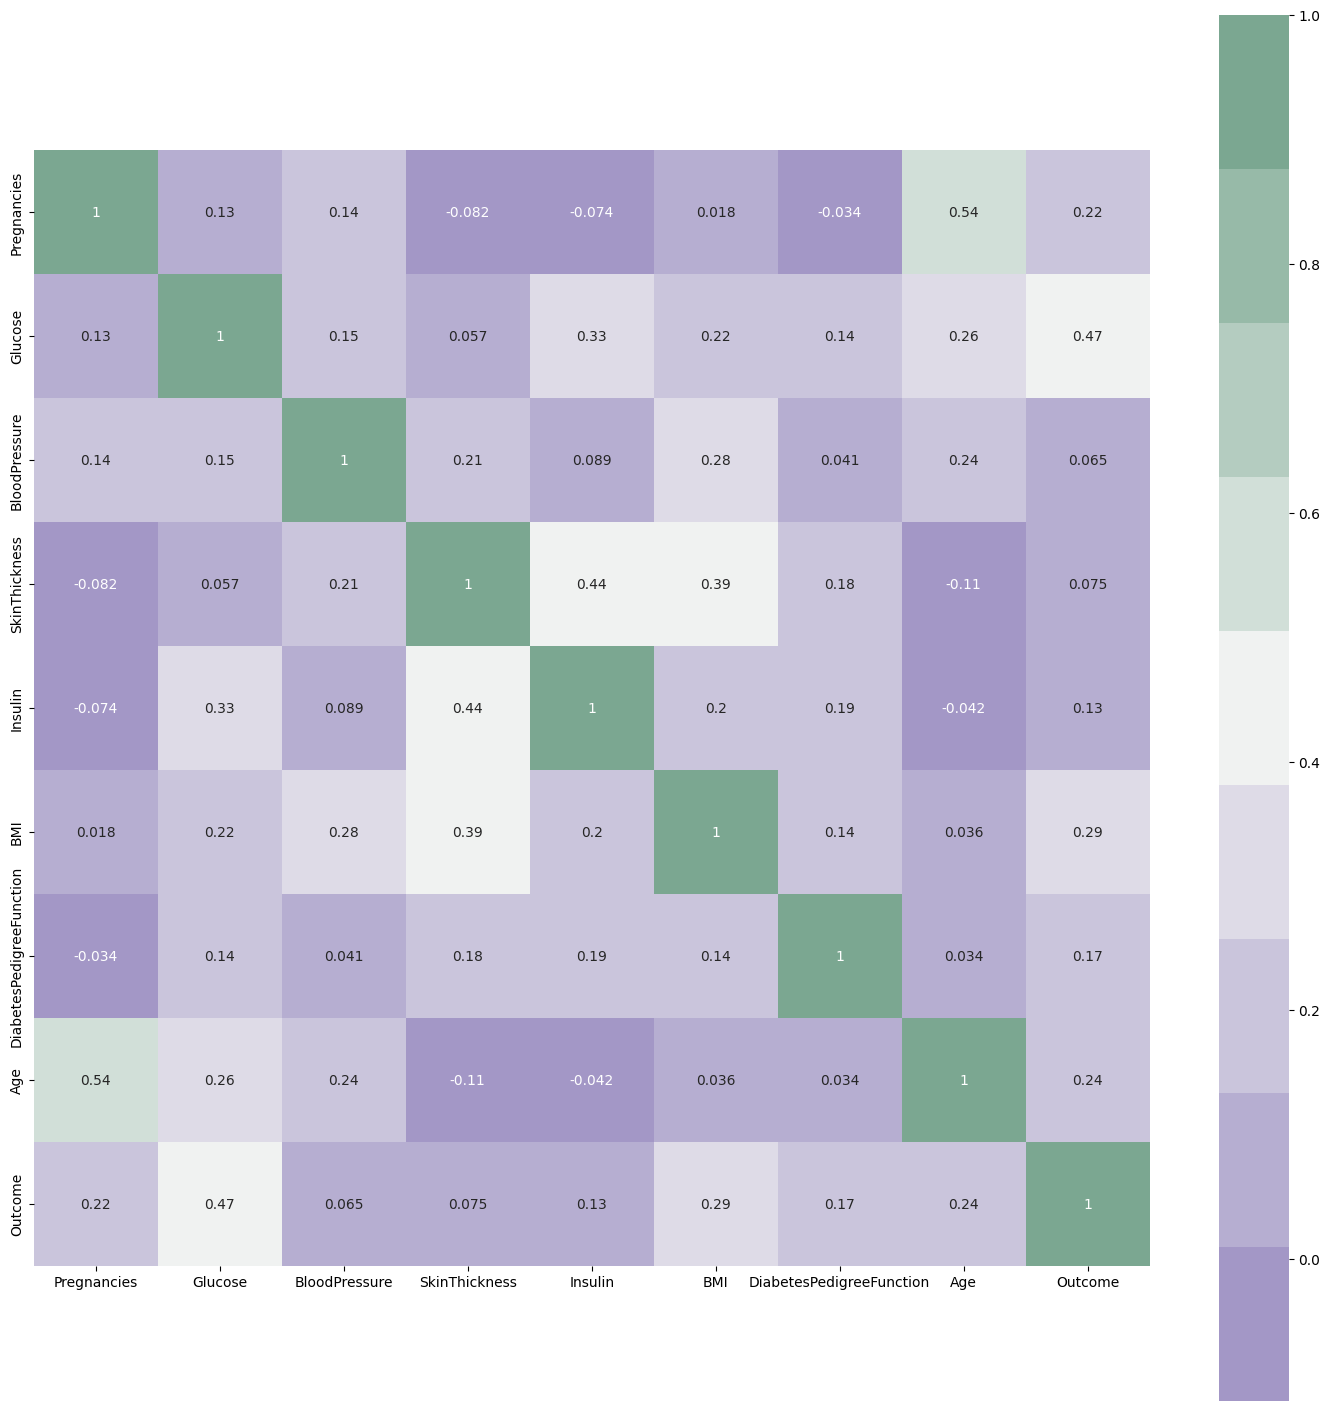

In [5]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [6]:
'''X = data.iloc[:, 0:7].values
y = data.iloc[:, 8].values'''
X=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

In [7]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,-9.251859e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,1.503427e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,1.006140e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.006854e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.590520e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


In [8]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)


In [12]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs =80,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/80
19/19 [==============================] - 1s 10ms/step - loss: 0.6919 - accuracy: 0.6522 - val_loss: 0.6908 - val_accuracy: 0.6379
Epoch 2/80
19/19 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.6609 - val_loss: 0.6885 - val_accuracy: 0.6379
Epoch 3/80
19/19 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.6609 - val_loss: 0.6863 - val_accuracy: 0.6379
Epoch 4/80
19/19 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.6609 - val_loss: 0.6831 - val_accuracy: 0.6379
Epoch 5/80
19/19 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.6609 - val_loss: 0.6778 - val_accuracy: 0.6379
Epoch 6/80
19/19 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.6609 - val_loss: 0.6676 - val_accuracy: 0.6379
Epoch 7/80
19/19 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6609 - val_loss: 0.6492 - val_accuracy: 0.6379
Epoch 8/80
19/19 [=

In [13]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 71.68%
